In [1]:
import nltk
import pandas as pd
import numpy as np
import os
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
os.chdir('F:\Board infinity\phonepe')

# Googlepay data

In [3]:
df_gpay1 = pd.read_csv('google_pay_reviews.csv')
df_gpay1[df_gpay1.Source=='Twitter'].index

Int64Index([42253, 42254, 42255, 42256, 42257, 42258, 42259, 42260, 42261,
            42262,
            ...
            42930, 42931, 42932, 42933, 42934, 42935, 42936, 42937, 42938,
            42939],
           dtype='int64', length=687)

In [4]:
df_gpay=df_gpay1.drop(index=df_gpay1[df_gpay1.Source=='Twitter'].index)

In [5]:
def processing(text):
    text = re.sub(r'[^ A-Z a-z ]+','',text)
    text = re.sub(r'\s+',' ',text)
    return text

In [6]:
df_gpay_processed = df_gpay.copy()
df_gpay_processed['Reviews'] = df_gpay['Reviews'].apply(processing)
print(df_gpay_processed.head())

              Source                                            Reviews
0  Google_Play_store  I installed this app on my new Samsung phone i...
1  Google_Play_store  Enter Google Pay v k Absolutely I love it I th...
2  Google_Play_store  G Pay great t s great money transfer app app f...
3  Google_Play_store  After the Google pay update i get de registere...
4  Google_Play_store  G pay t s rs Very awesome and genuine app I lo...


In [7]:
nlp = spacy.load('en_core_web_lg')

# Tokenisation, lemmatising, POS tagging

##### Finding most important word

In [8]:
def word_cloud(df): 
    comment_words = '' 
    stopwords = spacy.lang.en.stop_words.STOP_WORDS


    for val in df: 
        
        val = str(val) 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)):  
            tokens[i] = tokens[i].lower() 
      
        comment_words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

    return wordcloud

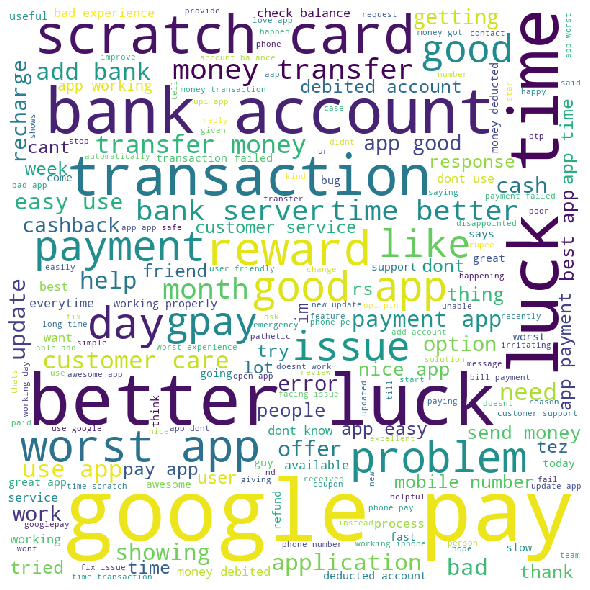

In [9]:
top_words_wordcloud = word_cloud(df_gpay_processed.Reviews).words_

In [10]:
top_20_words_wordcloud = list(top_words_wordcloud.keys())[:20]
print(top_20_words_wordcloud)

['google pay', 'better luck', 'luck time', 'bank account', 'transaction', 'scratch card', 'reward', 'worst app', 'day', 'problem', 'good app', 'payment', 'issue', 'gpay', 'good', 'like', 'money transfer', 'month', 'bank server', 'time better']


above are top 20 important words from word cloud. 
among them 'Google pay' and 'better luck' are highly most imporatant key words

In [11]:
df_GOOGLEPAY = pd.DataFrame()
df_GOOGLEPAY['Reviews'] = df_gpay_processed['Reviews'].apply(lambda x: x if ('time' in x.lower()) and  ('transaction' in x.lower()) else np.nan)
df_GOOGLEPAY.dropna(inplace=True)

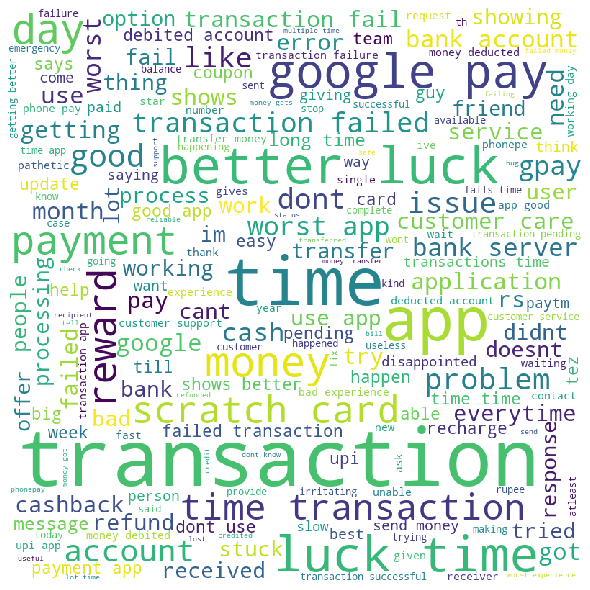

In [12]:
top_words_wc_GOOGLEPAY = word_cloud(df_GOOGLEPAY.Reviews).words_

# POS tagging, tagging and NER analysis

In [13]:
def sub_processing(text):
    text = re.sub(r'[^ A-Z a-z .\',]+','',text)
    text = re.sub(r'[.]+','.',text)
    text = re.sub(r'\s+',' ',text)
    return text

In [14]:
df_gpay_processed = df_gpay.copy()
df_gpay_processed['Reviews'] = df_gpay['Reviews'].apply(sub_processing)
print(df_gpay_processed.head())

              Source                                            Reviews
0  Google_Play_store  I installed this app on my new Samsung phone i...
1  Google_Play_store  Enter Google Pay v k Absolutely I love it I th...
2  Google_Play_store  G Pay great t s great money transfer app, app ...
3  Google_Play_store  After the Google pay update, i get de register...
4  Google_Play_store  G pay t s rs Very awesome and genuine app. I l...


In [15]:
def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)
nouns = []
adjs = []
verbs = []

In [16]:
df_gpay_processed.Reviews.apply(pos_extractor)

0        None
1        None
2        None
3        None
4        None
         ... 
42248    None
42249    None
42250    None
42251    None
42252    None
Name: Reviews, Length: 42253, dtype: object

In [17]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app          24188
time         14494
money        10034
account       9887
payment       9533
             ...  
case           294
banking        287
sim            281
hour           276
everytime      275
Name: nouns, Length: 100, dtype: int64


In [18]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

good            5697
better          5327
worst           3861
easy            3518
bad             2027
                ... 
unsuccessful      98
sad               93
worth             92
ok                87
blank             86
Name: adjs, Length: 100, dtype: int64


In [19]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

get        5247
work       4875
pay        4530
use        4263
show       3863
           ... 
accept      282
reward      281
would       268
hope        259
scratch     257
Name: verbs, Length: 100, dtype: int64


In [20]:
def ner_detection(review):
    if nlp(review).ents !=():
        for  ent in nlp(review).ents:
            ners.append([ent.text,ent.label_])

ners=[]

In [21]:
df_gpay_processed.Reviews.apply(ner_detection)

0        None
1        None
2        None
3        None
4        None
         ... 
42248    None
42249    None
42250    None
42251    None
42252    None
Name: Reviews, Length: 42253, dtype: object

In [22]:
df_ners = pd.DataFrame(ners,columns=['Text','NER_Label'])
df_ners[df_ners.NER_Label=='CARDINAL'].index
df_ners.drop(index=df_ners[df_ners.NER_Label=='CARDINAL'].index,inplace=True)

In [23]:
print(df_ners.NER_Label.unique())

['ORG' 'GPE' 'NORP' 'TIME' 'PERSON' 'LOC' 'DATE' 'ORDINAL' 'PRODUCT'
 'LANGUAGE' 'WORK_OF_ART' 'MONEY' 'FAC' 'EVENT' 'LAW' 'QUANTITY' 'PERCENT']


In [24]:
df_ners.Text[df_ners.NER_Label=='ORG'].value_counts()

Google           4780
google           3178
UPI              1160
upi               804
iPhone            743
                 ... 
apeset              1
Google Bsns         1
delayed.money       1
smoothlyI am        1
EMAIL               1
Name: Text, Length: 3432, dtype: int64

# Sentiment analysis of googlepay

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [26]:
df_gpay_processed['scores'] = df_gpay_processed.Reviews.apply(analyzer.polarity_scores)
df_gpay_processed.scores[0]
df_gpay_processed['compound_score_label'] = df_gpay_processed.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_gpay_processed.compound_score_label.value_counts()

pos        22627
neg        15888
neutral     3738
Name: compound_score_label, dtype: int64

In [27]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than gpay' in x) or ('better than google' in x) or ('best than gpay' in x) or ('better than google' in x) or ('not better than phonepe' in x) or ('not better than paytm' in x) or ('waste than phonepe' in x):
        return 'neg'
    elif ('not better than gpay' in x) or ('not better than google' in x) or('better than phonepe' in x) or ('better than paytm' in x) or ('best than phonepe' in x) or ('best than paytm' in x) or ('good than phonepe' in x) or ('good than paytm' in x) or ('faster than phonepe' in x) or ('faster than paytm' in x) or ('better than other' in x):
        return 'pos'

In [28]:
df_gpay_processed['temp'] = df_gpay_processed['Reviews'].apply(keyword_analyzer)

In [29]:
for index in df_gpay_processed.index:
    if df_gpay_processed['temp'][index] != None:
        df_gpay_processed.compound_score_label[index]=df_gpay_processed['temp'][index]

In [30]:
df_gpay_processed.drop(columns=['temp'],inplace=True)
df_gpay_processed.compound_score_label.value_counts()

pos        21861
neg        16802
neutral     3590
Name: compound_score_label, dtype: int64

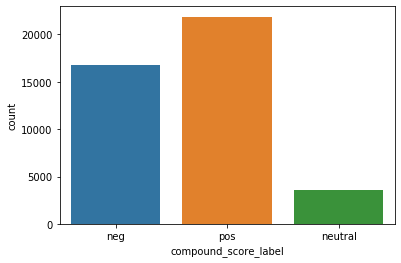

In [31]:
ax = sns.countplot(x='compound_score_label', data=df_gpay_processed)

# Sentiment analysis of paytm on the basis of payment_experience

In [32]:
df_gpay_payment_Experience = pd.DataFrame()
df_gpay_payment_Experience['Reviews'] = df_gpay_processed['Reviews'].apply(lambda x: x.lower() if ('transaction' in x.lower()) or ('service' in x.lower()) or ('payment' in x.lower()) or ('bank' in x.lower()) or ('payment' in x.lower())
or ('transfer' in x.lower()) or ('refund' in x.lower()) or ('merchant' in x.lower()) or ('credited' in x.lower()) or ('debited' in x.lower()) or ('upi' in x.lower()) or ('otp' in x.lower()) or ('time' in x.lower()) or ('fail' in x.lower()) or ('p2p' in x.lower()) or ('return' in x.lower()) else np.nan)
df_gpay_payment_Experience.dropna(inplace=True)

In [33]:
def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)

In [34]:
nouns = []
adjs = []
verbs = []

In [35]:
df_gpay_payment_Experience.Reviews.apply(pos_extractor)

0        None
1        None
2        None
3        None
4        None
         ... 
42247    None
42248    None
42249    None
42250    None
42252    None
Name: Reviews, Length: 29880, dtype: object

In [36]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app          17038
time         11319
money         8907
bank          8226
account       7945
             ...  
offer          248
customers      246
network        243
solution       240
trouble        240
Name: nouns, Length: 100, dtype: int64


In [37]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

better     5416
good       3797
worst      3335
easy       2103
bad        1650
           ... 
net          71
late         70
secured      70
perfect      69
faster       68
Name: adjs, Length: 100, dtype: int64


In [38]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

use          2887
pay          2397
working      2136
failed       2079
got          1883
             ... 
reach         245
seen          241
come          239
waiting       237
receiving     234
Name: verbs, Length: 100, dtype: int64


In [39]:
df_gpay_payment_Experience['scores'] = df_gpay_payment_Experience.Reviews.apply(analyzer.polarity_scores)
df_gpay_payment_Experience.scores[0]

{'neg': 0.033, 'neu': 0.915, 'pos': 0.052, 'compound': -0.1154}

In [40]:
df_gpay_payment_Experience['compound_score_label'] = df_gpay_payment_Experience.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_gpay_payment_Experience.compound_score_label.value_counts()

pos        15163
neg        12498
neutral     2219
Name: compound_score_label, dtype: int64

In [41]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than gpay' in x) or ('better than google' in x) or ('best than gpay' in x) or ('better than google' in x) or ('not better than phonepe' in x) or ('not better than paytm' in x) or ('waste than phonepe' in x):
        return 'neg'
    elif ('not better than gpay' in x) or ('not better than google' in x) or('better than phonepe' in x) or ('better than paytm' in x) or ('best than phonepe' in x) or ('best than paytm' in x) or ('good than phonepe' in x) or ('good than paytm' in x) or ('faster than phonepe' in x) or ('faster than paytm' in x) or ('better than other' in x):
        return 'pos'

In [42]:
df_gpay_payment_Experience['temp'] = df_gpay_payment_Experience['Reviews'].apply(keyword_analyzer)

In [43]:
for index in df_gpay_payment_Experience.index:
    if df_gpay_payment_Experience['temp'][index] != None:
        df_gpay_payment_Experience.compound_score_label[index]=df_gpay_payment_Experience['temp'][index]     

In [44]:
df_gpay_payment_Experience.drop(columns=['temp'],inplace=True)
df_gpay_payment_Experience.compound_score_label.value_counts()

pos        14168
neg        13687
neutral     2025
Name: compound_score_label, dtype: int64

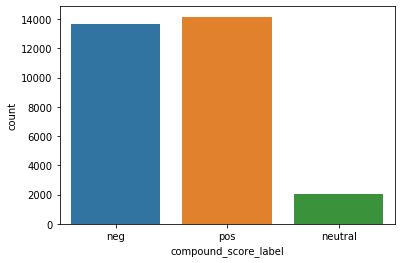

In [45]:
ax = sns.countplot(x='compound_score_label', data=df_gpay_payment_Experience)

# sentiment analysis of phonepe on the basis of offer

In [46]:
df_gpay_offer = pd.DataFrame()
df_gpay_offer['Reviews'] = df_gpay_processed['Reviews'].apply(lambda x: x.lower() if ('reward' in x.lower()) or ('coupon' in x.lower()) or ('scratch card' in x.lower()) or ('cashback' in x.lower()) or ('offer' in x.lower())
or ('discount' in x.lower()) or ('recharge' in x.lower()) or ('electricity' in x.lower()) or ('bill' in x.lower()) or ('gold' in x.lower())or ('switch' in x.lower()) or ('swiggy' in x.lower()) or ('dominos' in x.lower()) or ('train' in x.lower()) or ('qr' in x.lower()) else np.nan)
df_gpay_offer.dropna(inplace=True)

In [47]:
df_gpay_offer.Reviews.apply(pos_extractor)

5        None
8        None
10       None
11       None
12       None
         ... 
42228    None
42230    None
42232    None
42243    None
42245    None
Name: Reviews, Length: 8129, dtype: object

In [48]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app         21836
time        15297
money       11020
bank         8948
payment      8892
            ...  
feedback      323
year          316
request       314
reason        313
pin           310
Name: nouns, Length: 100, dtype: int64


In [49]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

better       8273
good         5030
worst        4082
easy         2606
bad          2123
             ... 
incorrect      95
late           92
lucky          92
clear          91
ok             90
Name: adjs, Length: 100, dtype: int64


In [50]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

use           3748
pay           3381
got           2613
getting       2595
failed        2429
              ... 
registered     314
account        309
receiving      308
waiting        305
seen           296
Name: verbs, Length: 100, dtype: int64


In [51]:
df_gpay_offer['scores'] = df_gpay_offer.Reviews.apply(analyzer.polarity_scores)
#df_phonepe_offer.scores[2]
df_gpay_offer['compound_score_label'] = df_gpay_offer.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_gpay_offer.compound_score_label.value_counts()

pos        5225
neg        2533
neutral     371
Name: compound_score_label, dtype: int64

In [65]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than gpay' in x) or ('better than google' in x) or ('best than gpay' in x) or ('better than google' in x) or ('not better than phonepe' in x) or ('not better than paytm' in x) or ('waste than phonepe' in x):
        return 'neg'
    elif ('not better than gpay' in x) or ('not better than google' in x) or('better than phonepe' in x) or ('better than paytm' in x) or ('best than phonepe' in x) or ('best than paytm' in x) or ('good than phonepe' in x) or ('good than paytm' in x) or ('faster than phonepe' in x) or ('faster than paytm' in x) or ('better than other' in x):
        return 'pos'

In [66]:
df_gpay_offer['temp'] = df_gpay_offer['Reviews'].apply(keyword_analyzer)

In [67]:
for index in df_gpay_offer.index:
    if df_gpay_offer['temp'][index] != None:
        df_gpay_offer.compound_score_label[index]=df_gpay_offer['temp'][index]

In [68]:
df_gpay_offer.drop(columns=['temp'],inplace=True)
df_gpay_offer.compound_score_label.value_counts()

pos        4903
neg        2873
neutral     353
Name: compound_score_label, dtype: int64

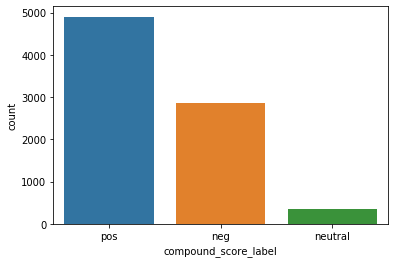

In [69]:
ax = sns.countplot(x='compound_score_label', data=df_gpay_offer)

# sentiment analysis of phonepe on the basis of AppUI

In [56]:
df_gpay_AppUI = pd.DataFrame()
df_gpay_AppUI['Reviews'] = df_gpay_processed['Reviews'].apply(lambda x: x.lower() if ('feature' in x.lower()) or ('hang' in x.lower()) or ('crashing' in x.lower()) or ('stucking' in x.lower()) or ('ui ' in x.lower())
or ('user interface' in x.lower()) or ('user friendly' in x.lower()) or ('fast' in x.lower()) or ('slow' in x.lower()) or ('easy' in x.lower()) or ('design' in x.lower()) or ('sleek' in x.lower()) else np.nan)
df_gpay_AppUI.dropna(inplace=True)

In [57]:
df_gpay_AppUI.Reviews.apply(pos_extractor)

0        None
1        None
2        None
15       None
17       None
         ... 
42187    None
42192    None
42242    None
42244    None
42248    None
Name: Reviews, Length: 7639, dtype: object

In [58]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app             26305
time            16485
money           12591
payment         10310
bank             9732
                ...  
kind              382
date              374
request           371
verification      370
options           364
Name: nouns, Length: 100, dtype: int64


In [59]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

better       8796
good         6330
easy         6203
worst        4350
bad          2274
             ... 
worth         121
incorrect     119
little        118
clear         115
sad           110
Name: adjs, Length: 100, dtype: int64


In [60]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

use           5203
pay           4107
getting       2811
got           2761
working       2685
              ... 
respond        352
registered     348
account        340
processing     340
recharged      339
Name: verbs, Length: 100, dtype: int64


In [61]:
df_gpay_AppUI['scores'] = df_gpay_AppUI.Reviews.apply(analyzer.polarity_scores)
#df_paytm_AppUI.scores[1]
df_gpay_AppUI['compound_score_label'] = df_gpay_AppUI.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_gpay_AppUI.compound_score_label.value_counts()

pos        5789
neg        1306
neutral     544
Name: compound_score_label, dtype: int64

In [70]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than gpay' in x) or ('better than google' in x) or ('best than gpay' in x) or ('better than google' in x) or ('not better than phonepe' in x) or ('not better than paytm' in x) or ('waste than phonepe' in x):
        return 'neg'
    elif ('not better than gpay' in x) or ('not better than google' in x) or('better than phonepe' in x) or ('better than paytm' in x) or ('best than phonepe' in x) or ('best than paytm' in x) or ('good than phonepe' in x) or ('good than paytm' in x) or ('faster than phonepe' in x) or ('faster than paytm' in x) or ('better than other' in x):
        return 'pos'

In [71]:
df_gpay_AppUI['temp'] = df_gpay_AppUI['Reviews'].apply(keyword_analyzer)

In [72]:
for index in df_gpay_AppUI.index:
    if df_gpay_AppUI['temp'][index] != None:
        df_gpay_AppUI.compound_score_label[index]=df_gpay_AppUI['temp'][index]

In [73]:
df_gpay_AppUI.drop(columns=['temp'],inplace=True)
df_gpay_AppUI.compound_score_label.value_counts()

pos        5669
neg        1444
neutral     526
Name: compound_score_label, dtype: int64

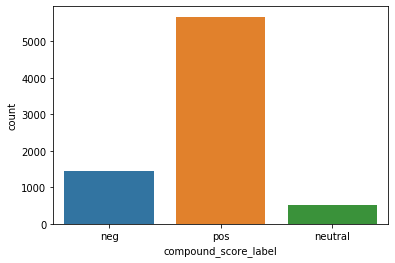

In [74]:
ax = sns.countplot(x='compound_score_label', data=df_gpay_AppUI)